In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Powerlaw (3 params)

$p(m) \propto H(m-m_{min})H(m_{max}-m) \frac{\gamma+1}{m_{max}^{\gamma+1} - m_{min}^{\gamma+1}} m^\gamma$

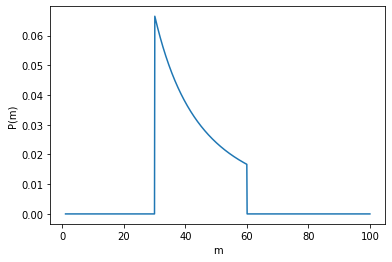

In [4]:
def single_power_law(m, m_min, m_max, gamma):
    tmp = (gamma+1)/(m_max**(gamma+1) - m_min**(gamma+1)) * m**gamma
    tmp[m<m_min] = 0
    tmp[m>m_max] = 0
    return tmp
m = np.linspace(1, 100, 1000)
plt.plot(m, single_power_law(m, 30, 60, -2))
plt.xlabel('m')
plt.ylabel('P(m)')
plt.show()    

Double Power Law

$p(m) \propto f H(m-m_{min1})H(m_{max1}-m) \frac{\gamma1+1}{m_{max1}^{\gamma1+1} - m_{min1}^{\gamma1+1}} m^{\gamma1} + (1-f) H(m-m_{min2})H(m_{max2}-m) \frac{\gamma2+1}{m_{max2}^{\gamma2+1} - m_{min2}^{\gamma2+1}} m^{\gamma2}$

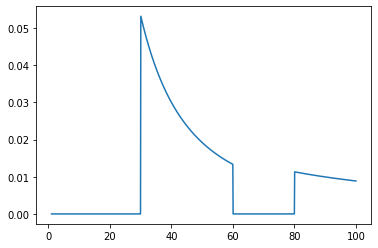

In [5]:
def double_power_law(m, f, m_min_1, m_max_1, gamma_1, m_min_2, m_max_2,gamma_2):
    tmp = f*single_power_law(m, m_min_1, m_max_1, gamma_1) + (1-f)*single_power_law(m, m_min_2, m_max_2, gamma_2)
    return tmp
m = np.linspace(1, 100, 1000)
plt.plot(m, double_power_law(m, 0.8, 30, 60, -2, 80, 100, -1.1))

Singe Power law + Peak

$p(m) \propto f H(m-m_{min})H(m_{max}-m) \frac{\gamma+1}{m_{max}^{\gamma+1} - m_{min}^{\gamma+1}} m^\gamma + (1-f) \frac{1}{\sqrt{2 \pi \sigma}} \exp (\frac{(m-\mu)^2}{2\sigma^2})$

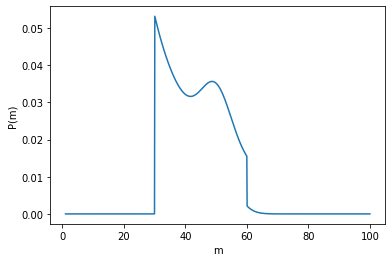

In [6]:
def single_power_law_plus_single_peak(m, f, m_min, m_max, gamma, mu, sigma):
    return (1-f) * norm.pdf(m, loc=mu, scale=sigma) + f * single_power_law(m, m_min, m_max, gamma)
m = np.linspace(1, 100, 1000)
plt.plot(m, single_power_law_plus_single_peak(m, 0.8, 30, 60, -2, 50, 5))
plt.xlabel('m')
plt.ylabel('P(m)')
plt.show()

Power law + Double Peak

$p(m) \propto f_1 H(m-m_{min})H(m_{max}-m) \frac{\gamma+1}{m_{max}^{\gamma+1} - m_{min}^{\gamma+1}} m^\gamma + f_2 \frac{1}{\sqrt{2 \pi \sigma_1}} \exp (\frac{(m-\mu_1)^2}{2\sigma_1^2}) + (1-f_1 - f_2) \frac{1}{\sqrt{2 \pi \sigma_2}} \exp (\frac{(m-\mu_2)^2}{2\sigma_2^2})$

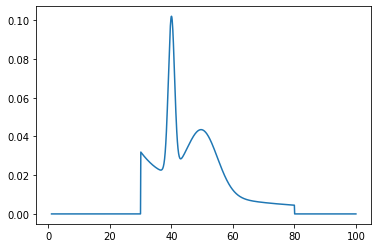

In [10]:
def single_power_law_plus_double_peak(m, f_1, m_min, m_max, gamma, f_2, mu_1, sigma_1, mu_2, sigma_2):
    return (1-f_1) * norm.pdf(m, loc=mu_1, scale=sigma_1) + f_1 * single_power_law(m, m_min, m_max, gamma) + (1-f_2-f_1) * norm.pdf(m, loc=mu_2, scale=sigma_2)
m = np.linspace(1, 100, 1000)
plt.plot(m, single_power_law_plus_double_peak(m, 0.6, 30, 80, -2, 0.2, 50, 5, 40, 1))

Double Power law + Peak

$p(m) \propto f_1 H(m-m_{min1})H(m_{max1}-m) \frac{\gamma1+1}{m_{max1}^{\gamma1+1} - m_{min1}^{\gamma1+1}} m^{\gamma1} + f_2 H(m-m_{min2})H(m_{max2}-m) \frac{\gamma2+1}{m_{max2}^{\gamma2+1} - m_{min2}^{\gamma2+1}} m^{\gamma2} + (1-f_1 - f_2) \frac{1}{\sqrt{2 \pi \sigma}} \exp (\frac{(m-\mu)^2}{2\sigma^2})$

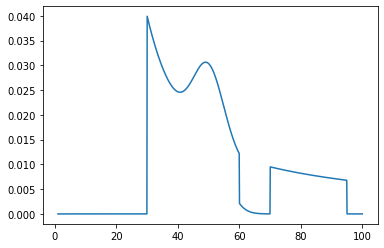

In [12]:
def double_power_law_plus_single_peak(m, f_1, m_min_1, m_max_1, gamma_1, f_2, m_min_2, m_max_2, gamma_2, mu, sigma):
    return f_1 * single_power_law(m, m_min_1, m_max_1, gamma_1) + f_2 * single_power_law(m, m_min_2, m_max_2, gamma_2) + (1-f_2-f_1) * norm.pdf(m, loc=mu, scale=sigma)
m = np.linspace(1, 100, 1000)
plt.plot(m, double_power_law_plus_single_peak(m, 0.6, 30, 60, -2, 0.2, 70, 95, -1.1, 50, 5))

Double Power law + Double Peak

$p(m) \propto f_1 H(m-m_{min1})H(m_{max1}-m) \frac{\gamma1+1}{m_{max1}^{\gamma1+1} - m_{min1}^{\gamma1+1}} m^{\gamma1} + f_2 H(m-m_{min2})H(m_{max2}-m) \frac{\gamma2+1}{m_{max2}^{\gamma2+1} - m_{min2}^{\gamma2+1}} m^{\gamma2} + f_3 \frac{1}{\sqrt{2 \pi \sigma_1}} \exp (\frac{(m-\mu_1)^2}{2\sigma_1^2}) + (1-f_1-f_2-f_3) \frac{1}{\sqrt{2 \pi \sigma_2}} \exp (\frac{(m-\mu_2)^2}{2\sigma_2^2})$

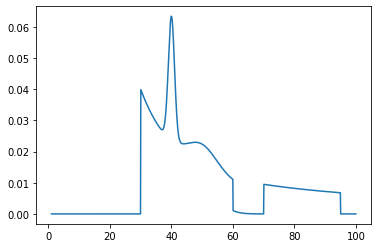

In [14]:
def double_power_law_plus_double_peak(m, f_1, m_min_1, m_max_1, gamma_1, f_2, m_min_2, m_max_2, gamma_2, f_3, mu_1, sigma_1, mu_2, sigma_2):
    return f_1 * single_power_law(m, m_min_1, m_max_1, gamma_1) + f_2 * single_power_law(m, m_min_2, m_max_2, gamma_2) + f_3 * norm.pdf(m, loc=mu_1, scale=sigma_1) + (1-f_2-f_1-f_3) * norm.pdf(m, loc=mu_2, scale=sigma_2)
m = np.linspace(1, 100, 1000)
plt.plot(m, double_power_law_plus_double_peak(m, 0.6, 30, 60, -2, 0.2, 70, 95, -1.1, 0.1, 40, 1, 50, 5))

Power law + spline in log space

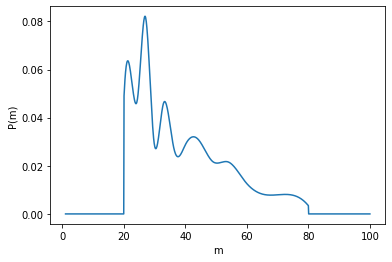

In [35]:
from scipy.interpolate import CubicSpline
def single_power_law_plus_spine(m, m_min, m_max, gamma, m_knots, m_knot_heights):
    tmp = single_power_law(m, m_min, m_max, gamma)
    tmp1 = np.interp(m_knots, m, tmp)*np.exp(m_knot_heights)
    cs = CubicSpline(m_knots, tmp1)
    tmp = cs(m)
    tmp[m<m_min] = 0
    tmp[m>m_max] = 0
    return tmp
m = np.linspace(1, 100, 1000)
m_min = 20
m_max = 80
n_knots = 15
m_knots = np.logspace(np.log10(m_min), np.log10(m_max), n_knots)
m_knot_heights = np.random.rand(n_knots)
m_knot_heights[0] = m_knot_heights[-1] = 0
plt.plot(m, single_power_law_plus_spine(m, m_min, m_max, -2, m_knots, m_knot_heights))
plt.xlabel('m')
plt.ylabel('P(m)')
plt.show()  